In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df_his_index=pd.read_csv("../../processed/his_index_tech_500_stable_14_24.csv")

In [4]:
df_his_index

,Date,tech_weight,Open,High,Low,Close,Open_wi,High_wi,Low_wi,Close_wi,Timedelta_days,pro_change_close_wi
0,2014-01-02,18.666742,1845.86,1845.86,1827.74,1831.98,344.561924,344.561924,341.179510,341.970980,0,-0.751953
1,2014-01-03,18.575319,1833.21,1838.24,1829.13,1831.37,340.524605,341.458944,339.766732,340.182820,1,-0.522898
2,2014-01-06,18.617887,1832.31,1837.16,1823.73,1826.77,341.137405,342.040373,339.539991,340.105974,3,-0.022589
3,2014-01-07,18.672965,1828.71,1840.10,1828.71,1837.88,341.474378,343.601229,341.474378,343.186689,1,0.905810
4,2014-01-08,18.639790,1837.90,1840.02,1831.40,1837.49,342.580700,342.975864,341.369114,342.504277,1,-0.198846
...,...,...,...,...,...,...,...,...,...,...,...,...
2563,2024-10-24,37.089590,5817.80,5817.80,5784.92,5809.86,2157.798167,2157.798167,2145.603110,2154.853254,1,0.014143
2564,2024-10-25,37.319370,5826.75,5862.82,5799.98,5808.12,2174.506391,2187.967488,2164.515996,2167.553793,1,0.589392
2565,2024-10-28,37.250240,5833.93,5842.92,5823.08,5823.52,2173.152926,2176.501723,2169.111275,2169.275176,3,0.079416
2566,2024-10-29,37.562030,5819.68,5847.19,5802.17,5832.92,2185.989948,2196.323262,2179.412836,2190.963160,1,0.999780


In [5]:
lst_date_we_care=df_his_index["Date"].to_list()

In [6]:
df_fed=pd.read_csv("../../raw/macro_daily/DFF.csv")

In [7]:
df_fed

,observation_date,DFF
0,2012-01-01,0.04
1,2012-01-02,0.04
2,2012-01-03,0.07
3,2012-01-04,0.07
4,2012-01-05,0.07
...,...,...
4817,2025-03-10,4.33
4818,2025-03-11,4.33
4819,2025-03-12,4.33
4820,2025-03-13,4.33


In [8]:
df_fed_care=df_fed[df_fed["observation_date"].isin(lst_date_we_care)]

In [9]:
df_fed_care

,observation_date,DFF
732,2014-01-02,0.08
733,2014-01-03,0.08
736,2014-01-06,0.08
737,2014-01-07,0.07
738,2014-01-08,0.07
...,...,...
4680,2024-10-24,4.83
4681,2024-10-25,4.83
4684,2024-10-28,4.83
4685,2024-10-29,4.83


No missing value, happy:).

In [10]:
df_fed_care.to_csv("../../processed/fed_rate_we_care.csv")

In [31]:
df_fed_care["observation_date"]=pd.to_datetime(df_fed_care["observation_date"])
df_his_index["Date"]=pd.to_datetime(df_his_index["Date"])

/tmp/ipykernel_108855/2049649513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fed_care["observation_date"]=pd.to_datetime(df_fed_care["observation_date"])


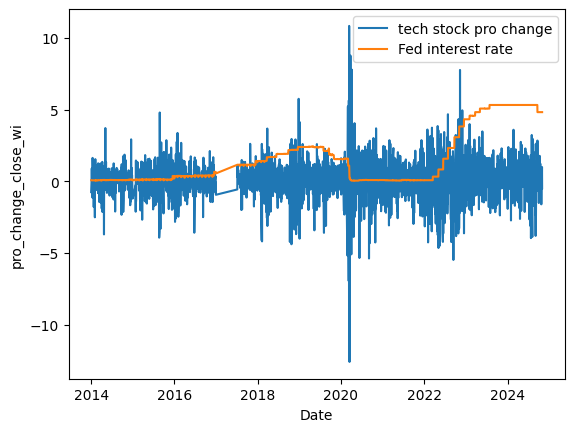

In [32]:
sns.lineplot(data=df_his_index, x="Date", y="pro_change_close_wi", label="tech stock pro change")
sns.lineplot(data=df_fed_care, x="observation_date", y="DFF", label="Fed interest rate")
plt.show()

I am not seeing a clear correlation at this stage. 